In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pickle
import numpy as np
import pandas as pd

In [2]:
ev_bounds = pickle.load(open('Preprocessing/pickle/ev_bounds36.pickle', 'rb'))
target_TRs = pickle.load(open('target_TRs.pickle', 'rb'))

Text(256, 95, 'Social')

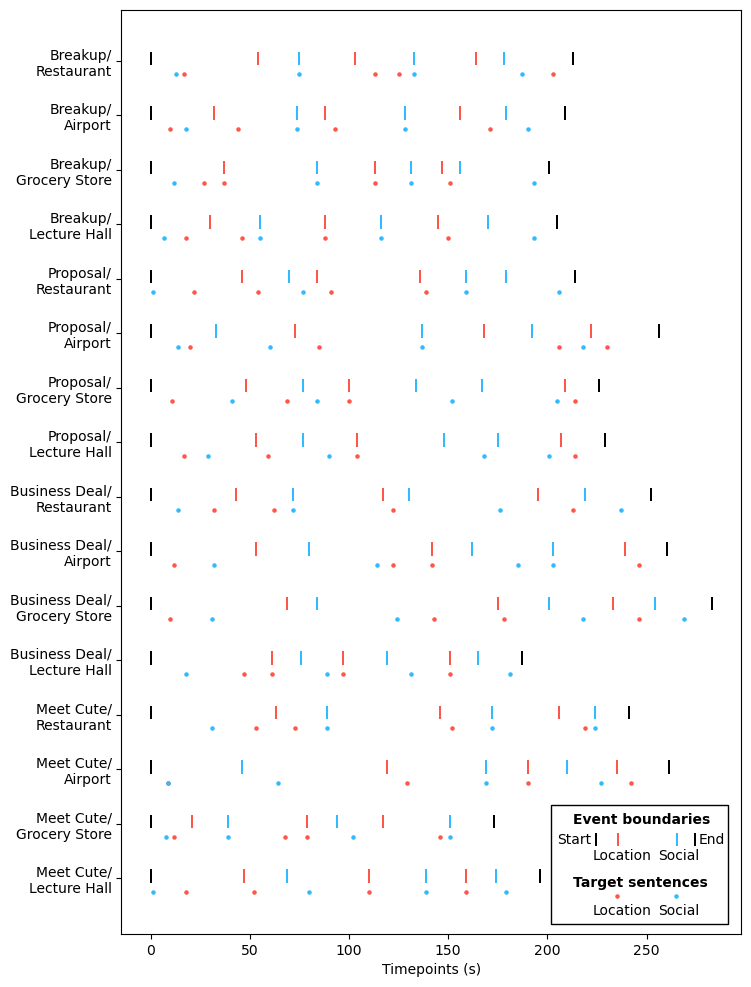

In [62]:
plt.figure(figsize=(8,12))
ax = plt.gca()
colors = ["#30baff", "#ff564a"]
for story_i, story in enumerate(ev_bounds.keys()):
    ax.scatter(target_TRs[story]['location'], 6*story_i*np.ones(4)+2.5, c=colors[1], s=5)
    ax.scatter(target_TRs[story]['social'], 6*story_i*np.ones(4)+2.5, c=colors[0], s=5)
    for b in ev_bounds[story]['ISC']['location'][1:-1]:
        ax.add_patch(patches.Rectangle((b-0.5, 6*story_i), 1, 1.5, linewidth=0, facecolor=colors[1]))
    for b in ev_bounds[story]['ISC']['social'][1:-1]:
        ax.add_patch(patches.Rectangle((b-0.5, 6*story_i), 1, 1.5, linewidth=0, facecolor=colors[0]))
    b = ev_bounds[story]['ISC']['social'][-1]
    ax.add_patch(patches.Rectangle((b-0.5, 6*story_i), 1, 1.5, linewidth=0, facecolor="#000000"))
    ax.add_patch(patches.Rectangle((0-0.5, 6*story_i), 1, 1.5, linewidth=0, facecolor="#000000"))

plt.xlabel("Timepoints (s)")
plt.gca().invert_yaxis()

def schemas(story_num):
    social = story_num//10
    if social == 1:
        label = "Breakup/\n"
    elif social == 2:
        label = "Proposal/\n"
    elif social == 3:
        label = "Business Deal/\n"
    elif social == 4:
        label = "Meet Cute/\n"

    location = story_num - (story_num//10)*10
    if location == 1:
        label += "Restaurant"
    elif location == 2:
        label += "Airport"
    elif location == 3:
        label += "Grocery Store"
    elif location == 4:
        label += "Lecture Hall"

    return label

plt.yticks(6*np.arange(16)+1, [schemas(s) for s in ev_bounds.keys()]);

ax.autoscale(False, axis="both")

ax.add_patch(patches.Rectangle((202, 83), 89, 13, linewidth=1, edgecolor="#000000", fill=False))

ax.text(213,85,'Event boundaries', fontweight='bold')
ax.add_patch(patches.Rectangle((224, 86), 1, 1.5, linewidth=0, facecolor="#000000"))
ax.text(205,87.25,'Start')
ax.add_patch(patches.Rectangle((235, 86), 1, 1.5, linewidth=0, facecolor="#ff564a"))
ax.text(223,89,'Location')
ax.add_patch(patches.Rectangle((265, 86), 1, 1.5, linewidth=0, facecolor="#30baff"))
ax.text(256,89,'Social')
ax.add_patch(patches.Rectangle((274, 86), 1, 1.5, linewidth=0, facecolor="#000000"))
ax.text(276,87.25,'End')

ax.text(213,92,'Target sentences', fontweight='bold')
ax.scatter(235, 93, c=colors[1], s=5)
ax.text(223,95,'Location')
ax.scatter(265, 93, c=colors[0], s=5)
ax.text(256,95,'Social')

In [63]:
dur_list = []
print('Location event durations (s)')
for ev in range(4):
    all_dur = np.array([ev_bounds[s]['ISC']['location'][ev+1]-ev_bounds[s]['ISC']['location'][ev] for s in ev_bounds])
    print('Ev',ev+1,':',round(all_dur.mean(),2),'+-',round(all_dur.std(),2))
    dur_list.append(all_dur)
print(' ')
print('Social event durations (s)')
for ev in range(4):
    all_dur = np.array([ev_bounds[s]['ISC']['social'][ev+1]-ev_bounds[s]['ISC']['social'][ev] for s in ev_bounds])
    print('Ev',ev+1,':',round(all_dur.mean(),2),'+-',round(all_dur.std(),2))
    dur_list.append(all_dur)

Location event durations (s)
Ev 1 : 53.06 +- 21.85
Ev 2 : 65.94 +- 19.49
Ev 3 : 63.56 +- 21.59
Ev 4 : 42.81 +- 16.4
 
Social event durations (s)
Ev 1 : 68.75 +- 16.08
Ev 2 : 73.25 +- 23.66
Ev 3 : 45.25 +- 15.88
Ev 4 : 38.12 +- 14.49


In [65]:
np.mean(dur_list)

56.34375

In [5]:
print('Location Target times (s)')
for target in range(4):
    all_dur = np.array([target_TRs[s]['location'][target] for s in ev_bounds])
    print('Target',target+1,':',round(all_dur.mean(),2),'+-',round(all_dur.std(),2))
print(' ')
print('Location Target intervals (s)')
for target in range(3):
    all_dur = np.array([target_TRs[s]['location'][target+1]-target_TRs[s]['location'][target] for s in ev_bounds])
    print('Target',target+1,target+2,':',round(all_dur.mean(),2),'+-',round(all_dur.std(),2))
print(' ')
print('Social Target times (s)')
for target in range(4):
    all_dur = np.array([target_TRs[s]['social'][target] for s in ev_bounds])
    print('Target',target+1,':',round(all_dur.mean(),2),'+-',round(all_dur.std(),2))
print(' ')
print('Social Target intervals (s)')
for target in range(3):
    all_dur = np.array([target_TRs[s]['social'][target+1]-target_TRs[s]['social'][target] for s in ev_bounds])
    print('Target',target+1,target+2,':',round(all_dur.mean(),2),'+-',round(all_dur.std(),2))

Location Target times (s)
Target 1 : 20.94 +- 12.64
Target 2 : 76.06 +- 31.82
Target 3 : 124.38 +- 37.5
Target 4 : 193.38 +- 38.39
 
Location Target intervals (s)
Target 1 2 : 55.12 +- 37.91
Target 2 3 : 48.31 +- 27.05
Target 3 4 : 69.0 +- 24.97
 
Social Target times (s)
Target 1 : 17.44 +- 11.6
Target 2 : 79.38 +- 20.12
Target 3 : 151.0 +- 28.51
Target 4 : 204.0 +- 26.39
 
Social Target intervals (s)
Target 1 2 : 61.94 +- 15.65
Target 2 3 : 71.62 +- 18.22
Target 3 4 : 53.0 +- 14.73


In [6]:
print('Target time within location event (s)')
for ev in range(4):
    ev_start = np.array([ev_bounds[s]['ISC']['location'][ev] for s in ev_bounds])
    target_time = np.array([target_TRs[s]['location'][ev] for s in ev_bounds])
    rel_time = target_time-ev_start
    print('Ev',ev+1,':',round(rel_time.mean(),2),'+-',round(rel_time.std(),2))
print(' ')
print('Target time within social event (s)')
for ev in range(4):
    ev_start = np.array([ev_bounds[s]['ISC']['social'][ev] for s in ev_bounds])
    target_time = np.array([target_TRs[s]['social'][ev] for s in ev_bounds])
    rel_time = target_time-ev_start
    print('Ev',ev+1,':',round(rel_time.mean(),2),'+-',round(rel_time.std(),2))

Target time within location event (s)
Ev 1 : 20.94 +- 12.64
Ev 2 : 23.0 +- 23.89
Ev 3 : 5.38 +- 10.03
Ev 4 : 10.81 +- 10.2
 
Target time within social event (s)
Ev 1 : 17.44 +- 11.6
Ev 2 : 10.62 +- 12.65
Ev 3 : 9.0 +- 12.67
Ev 4 : 16.75 +- 11.87


In [8]:
print('Location event ANOVA')
df = pd.DataFrame(columns = ['Ev', 'Script', 'Dur'], index = list(np.arange(4*4*4)))
row = 0
for ev in range(4):
    for script in range(1,4+1):
        for story in [s for s in list(ev_bounds.keys()) if s % 10 == script]:
            df.loc[row] = [ev, script, ev_bounds[story]['ISC']['location'][ev+1]-ev_bounds[story]['ISC']['location'][ev]]
            row += 1
df = df.astype({'Ev': 'int64', 'Script': 'int64','Dur': 'int64'})

from statsmodels.formula.api import ols
import statsmodels.api as sm
lm = ols('Dur ~ C(Ev)*C(Script)', data=df).fit()
sm.stats.anova_lm(lm, typ=2) # Type 2 Anova DataFrame

Location event ANOVA


,sum_sq,df,F,PR(>F)
C(Ev),5408.1875,3.0,4.074828,0.011723
C(Script),935.3125,3.0,0.704716,0.553898
C(Ev):C(Script),3309.4375,9.0,0.831171,0.591030
Residual,21235.5000,48.0,NaN,NaN


In [9]:
print('Social event ANOVA')
df = pd.DataFrame(columns = ['Ev', 'Script', 'Dur'], index = list(np.arange(4*4*4)))
row = 0
for ev in range(4):
    for script in range(1,4+1):
        for story in [s for s in list(ev_bounds.keys()) if s // 10 == script]:
            df.loc[row] = [ev, script, ev_bounds[story]['ISC']['social'][ev+1]-ev_bounds[story]['ISC']['social'][ev]]
            row += 1
df = df.astype({'Ev': 'int64', 'Script': 'int64','Dur': 'int64'})

from statsmodels.formula.api import ols
import statsmodels.api as sm
lm = ols('Dur ~ C(Ev)*C(Script)', data=df).fit()
sm.stats.anova_lm(lm, typ=2) # Type 2 Anova DataFrame

Social event ANOVA


,sum_sq,df,F,PR(>F)
C(Ev),14315.6875,3.0,14.868132,5.627650e-07
C(Script),835.3125,3.0,0.867547,4.644403e-01
C(Ev):C(Script),4247.9375,9.0,1.470622,1.861005e-01
Residual,15405.5000,48.0,NaN,NaN
